In [3]:
!git clone https://github.com/EQuiw/2019-scalingattack

Cloning into '2019-scalingattack'...
remote: Enumerating objects: 108, done.
remote: Counting objects: 100% (108/108), done.
remote: Compressing objects: 100% (88/88), done.
remote: Total 108 (delta 28), reused 94 (delta 19), pack-reused 0
Receiving objects: 100% (108/108), 715.06 KiB | 13.49 MiB/s, done.
Resolving deltas: 100% (28/28), done.


In [4]:
!ls

2019-scalingattack  sample_data


In [5]:
%cd 2019-scalingattack

/content/2019-scalingattack


In [6]:
%cd scaleatt

/content/2019-scalingattack/scaleatt


In [7]:
from utils.plot_image_utils import plot_images_in_actual_size

from scaling.ScalingGenerator import ScalingGenerator
from scaling.SuppScalingLibraries import SuppScalingLibraries
from scaling.SuppScalingAlgorithms import SuppScalingAlgorithms
from scaling.ScalingApproach import ScalingApproach
from attack.QuadrScaleAttack import QuadraticScaleAttack
from attack.ScaleAttackStrategy import ScaleAttackStrategy
from utils.load_image_data import load_image_examples

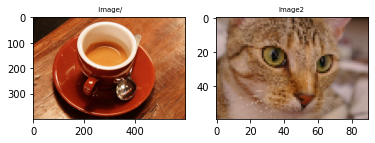

In [8]:
src_image_example, tar_image_example = load_image_examples(img_src=2)


In [9]:


# Let's use the nearest scaling algorithm which is often the default algorithm.
scaling_algorithm: SuppScalingAlgorithms = SuppScalingAlgorithms.NEAREST
# We support OpenCV, Pillow or TensorFlow (consider that Pillow has a 'secure' scaling behaviour for
# Linear and Cubic, see Sec. 4.2 USENIX Security'20 paper)
scaling_library: SuppScalingLibraries = SuppScalingLibraries.CV



In [10]:
scaler_approach: ScalingApproach = ScalingGenerator.create_scaling_approach(
    x_val_source_shape=src_image_example.shape,
    x_val_target_shape=tar_image_example.shape,
    lib=scaling_library,
    alg=scaling_algorithm
)

In [11]:
scale_att: ScaleAttackStrategy = QuadraticScaleAttack(eps=1, verbose=False)

result_attack_image, _, _ = scale_att.attack(src_image=src_image_example,
                                             target_image=tar_image_example,
                                             scaler_approach=scaler_approach)

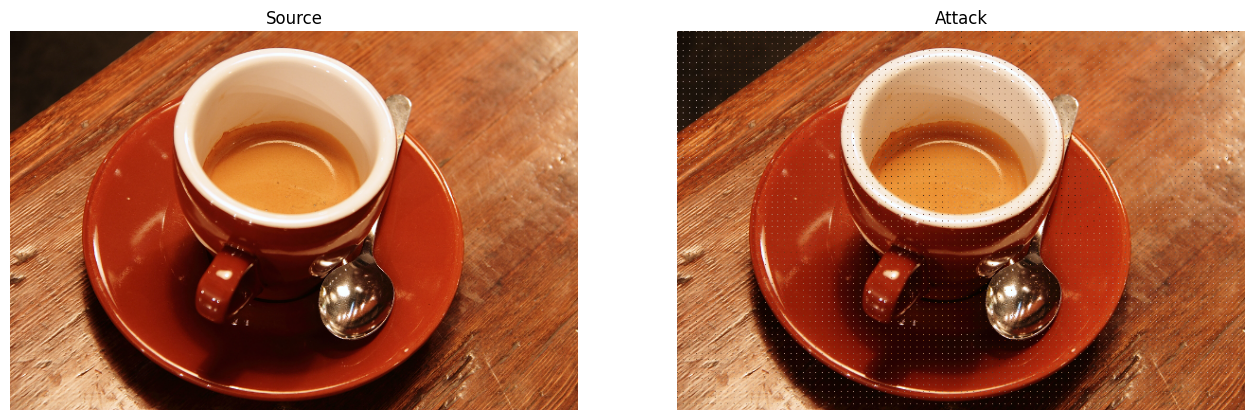

In [12]:
# Let's first analyze O2
plot_images_in_actual_size(imgs=[src_image_example, result_attack_image], titles=["Source", "Attack"], rows=1)

In [13]:
# To this end, let's scale down the attack image, as we would do in a real machine learning pipeline.
result_output_image = scaler_approach.scale_image(xin=result_attack_image)

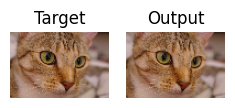

In [14]:
# Let's analyze O1
plot_images_in_actual_size(imgs=[tar_image_example, result_output_image], titles=["Target", "Output"], rows=1)